# Ganesh J


### letsgrowmore

### Topic : Stock Market Prediction And Forecasting Using Stacked LSTM
### Level: BEGINNER (2)
### Task number :2

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras

In [22]:

train= pd.read_csv('Price_train.csv')
test= pd.read_csv('Price_test.csv')

In [23]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [33]:
train_open= train.iloc[:, 1:2].values

from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)
train_open_scaled[60]

array([0.08627874])

In [34]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [35]:

xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [36]:
xtrain.shape

(1198, 60, 1)

In [37]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

### Stacked LSTM

In [38]:

regression= Sequential()

regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.3))


regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.3))


regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.3))

regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.3))

regression.add(Dense(units=1))


regression.compile(optimizer='adam',loss='mean_squared_error')


regression.fit(xtrain,ytrain,batch_size=30,epochs=60)

Epoch 1/60
40/40 [==============================] - 8s 56ms/step - loss: 0.0475
Epoch 2/60
40/40 [==============================] - 2s 56ms/step - loss: 0.0099
Epoch 3/60
40/40 [==============================] - 2s 55ms/step - loss: 0.0084
Epoch 4/60
40/40 [==============================] - 2s 56ms/step - loss: 0.0083
Epoch 5/60
40/40 [==============================] - 2s 55ms/step - loss: 0.0077
Epoch 6/60
40/40 [==============================] - 2s 55ms/step - loss: 0.0067
Epoch 7/60
40/40 [==============================] - 2s 57ms/step - loss: 0.0060
Epoch 8/60
40/40 [==============================] - 2s 56ms/step - loss: 0.0055
Epoch 9/60
40/40 [==============================] - 2s 55ms/step - loss: 0.0064
Epoch 10/60
40/40 [==============================] - 2s 59ms/step - loss: 0.0062
Epoch 11/60
40/40 [==============================] - 2s 60ms/step - loss: 0.0062
Epoch 12/60
40/40 [==============================] - 2s 59ms/step - loss: 0.0064
Epoch 13/60
40/40 [==================

### Predicting for test data

In [39]:

test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [40]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [41]:
xtest= np.array(xtest)

In [42]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

In [43]:
predicted_value= ss.inverse_transform(predicted_value)

### Plotting the data

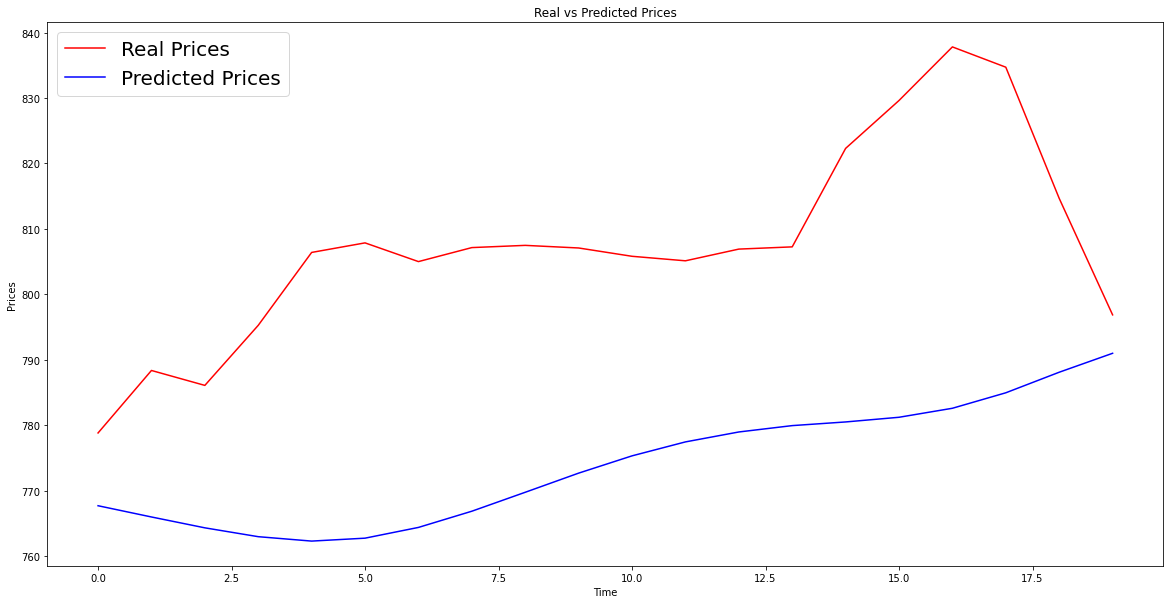

In [44]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)


### Thankyou!
